In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd

In [ ]:
samples = 1000
seed = 1337
np.random.seed(seed)
tf.random.set_seed(seed)

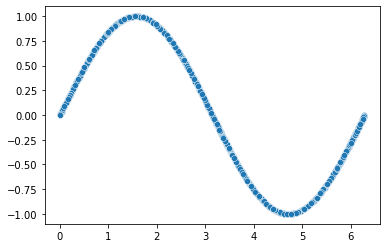

In [ ]:
#generating uniform values from 0 to 2pi
x_values = np.random.uniform(size = samples, low = 0, high = 2*math.pi)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
# plt.plot(x_values, y_values, "b.") #the b. is blue dots on the plot
sns.scatterplot(x = x_values, y = y_values)

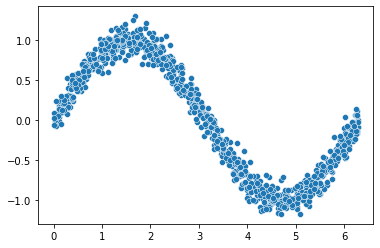

In [ ]:
y_values += 0.1*np.random.randn(*y_values.shape) # This is to provide randomness into y values.
sns.scatterplot(x = x_values, y = y_values)

In [ ]:
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
train = int(0.6 * samples)
test = int(0.2 *samples + train)
# x_train, x_validate, x_test = np.split(x_values, [train, test])
# y_train, y_validate, y_test = np.split(y_values, [train, test])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_values,y_values,train_size = 0.6)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size = 0.5)

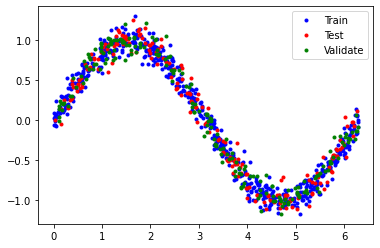

In [ ]:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'g.', label = "Validate")
plt.legend()
plt.show()

In [ ]:
# We'll use Keras to create a simple model architecture
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of model's architect
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs = 1000, batch_size = 16, validation_data = (x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 8ms/step - loss: 0.7766 - mae: 0.7743 - val_loss: 0.5644 - val_mae: 0.6748
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.4850 - mae: 0.6139 - val_loss: 0.4676 - val_mae: 0.5871
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4210 - mae: 0.5581 - val_loss: 0.4220 - val_mae: 0.5555
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3837 - mae: 0.5327 - val_loss: 0.3845 - val_mae: 0.5302
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3486 - mae: 0.5080 - val_loss: 0.3487 - val_mae: 0.5044
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3172 - mae: 0.4850 - val_loss: 0.3161 - val_mae: 0.4840
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2890 - mae: 0.4647 - val_loss: 0.2863 - val_mae: 0.4668
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.

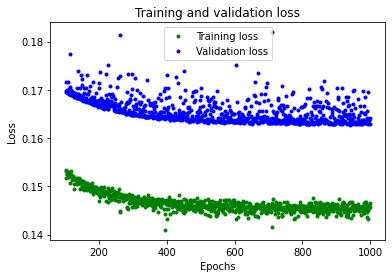

In [ ]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1,len(loss)+1)

#plotting training loss and validation loss from the model and skipping the first 100 values for having a closer look at the graph

plt.plot(epochs[100:], loss[100:], 'g.', label='Training loss')
plt.plot(epochs[100:], val_loss[100:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

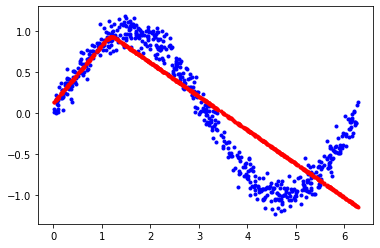

In [ ]:
y_pred = model_1(x_train)
plt.plot(x_train, y_train, "b.") 
plt.plot(x_train, y_pred, "r.")

In [ ]:
model2 = tf.keras.Sequential()
model2.add(layers.Dense(16, activation = 'relu',input_shape = (1,)))
model2.add(layers.Dense(16, activation = 'relu'))
model2.add(layers.Dense(1))
model2.compile(optimizer = "rmsprop", loss = 'mse', metrics = 'mae')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model2.fit(x_train, y_train, epochs = 600, batch_size = 16, validation_data = (x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 7ms/step - loss: 0.4164 - mae: 0.5612 - val_loss: 0.3548 - val_mae: 0.5196
Epoch 2/600
38/38 [==============================] - 0s 3ms/step - loss: 0.3474 - mae: 0.5094 - val_loss: 0.3002 - val_mae: 0.4799
Epoch 3/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2864 - mae: 0.4622 - val_loss: 0.2493 - val_mae: 0.4364
Epoch 4/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2398 - mae: 0.4239 - val_loss: 0.2194 - val_mae: 0.4127
Epoch 5/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2060 - mae: 0.3955 - val_loss: 0.1896 - val_mae: 0.3817
Epoch 6/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1793 - mae: 0.3692 - val_loss: 0.1742 - val_mae: 0.3631
Epoch 7/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1645 - mae: 0.3490 - val_loss: 0.1668 - val_mae: 0.3501
Epoch 8/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1539 - m

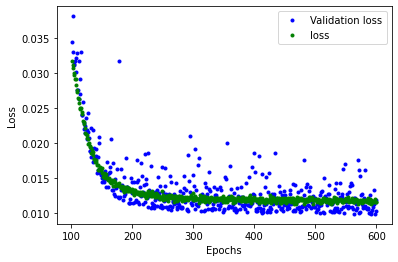

In [ ]:
loss2 = history_2.history['loss']
val_loss2 = history_2.history['val_loss']
epochs = np.arange(start = 1, stop = len(loss2) + 1)
skip = 100
plt.plot(epochs[100:], val_loss2[100:], "b.", label = "Validation loss")
plt.plot(epochs[100:], loss2[100:], "g.", label = "loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

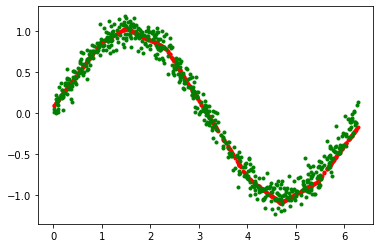

In [ ]:
y2_pred = model2(x_train)
plt.plot(x_train, y2_pred, "r.")
plt.plot(x_train, y_train, "g.")

In [ ]:
print(tf.__version__)
print(help(tf.lite.TFLiteConverter))

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model2)
tflite_model = converter.convert()

# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model2)

# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define a generator function that provides our test data's x values as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
# Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator

# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpxer6q6je/assets


INFO:tensorflow:Assets written to: /tmp/tmpxer6q6je/assets


INFO:tensorflow:Assets written to: /tmp/tmp9727ntzn/assets


INFO:tensorflow:Assets written to: /tmp/tmp9727ntzn/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


2752

In [ ]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = \
sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays

for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)

  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  
  # Run inference
  sine_model.invoke()

  # Read the prediction from the output tensor
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])

  # Do the same for the quantized model
  sine_model_quantized.set_tensor\
  (sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

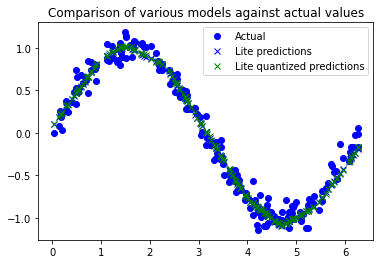

In [ ]:
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
label='Lite quantized predictions')
plt.legend()
plt.show()

In [ ]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2932 bytes
Quantized model is 2752 bytes
Difference is 180 bytes


In [ ]:
#Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x38, 0x01, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0xe0, 0x00, 0x00, 0x00,
  0x58, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x38, 0x05, 0x00, 0x00,
  0x44, 0x04, 0x00, 0x00, 0xe8, 0x01, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x38, 0x01, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x60, 0x0a, 0x00, 0x00,
  0x5c, 0x0a, 0x00, 0x00, 0x48, 0x09,